In [1]:
import pandas as pd
import numpy as np
from numpy import inf, nan
import datetime
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.dates as mdates
import datetime

In [2]:
df = pd.read_csv("market_info_forge_monthly.csv")

In [3]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot_date([x1,x2],[y1,y2],'r--', xdate = True, label = "trend")

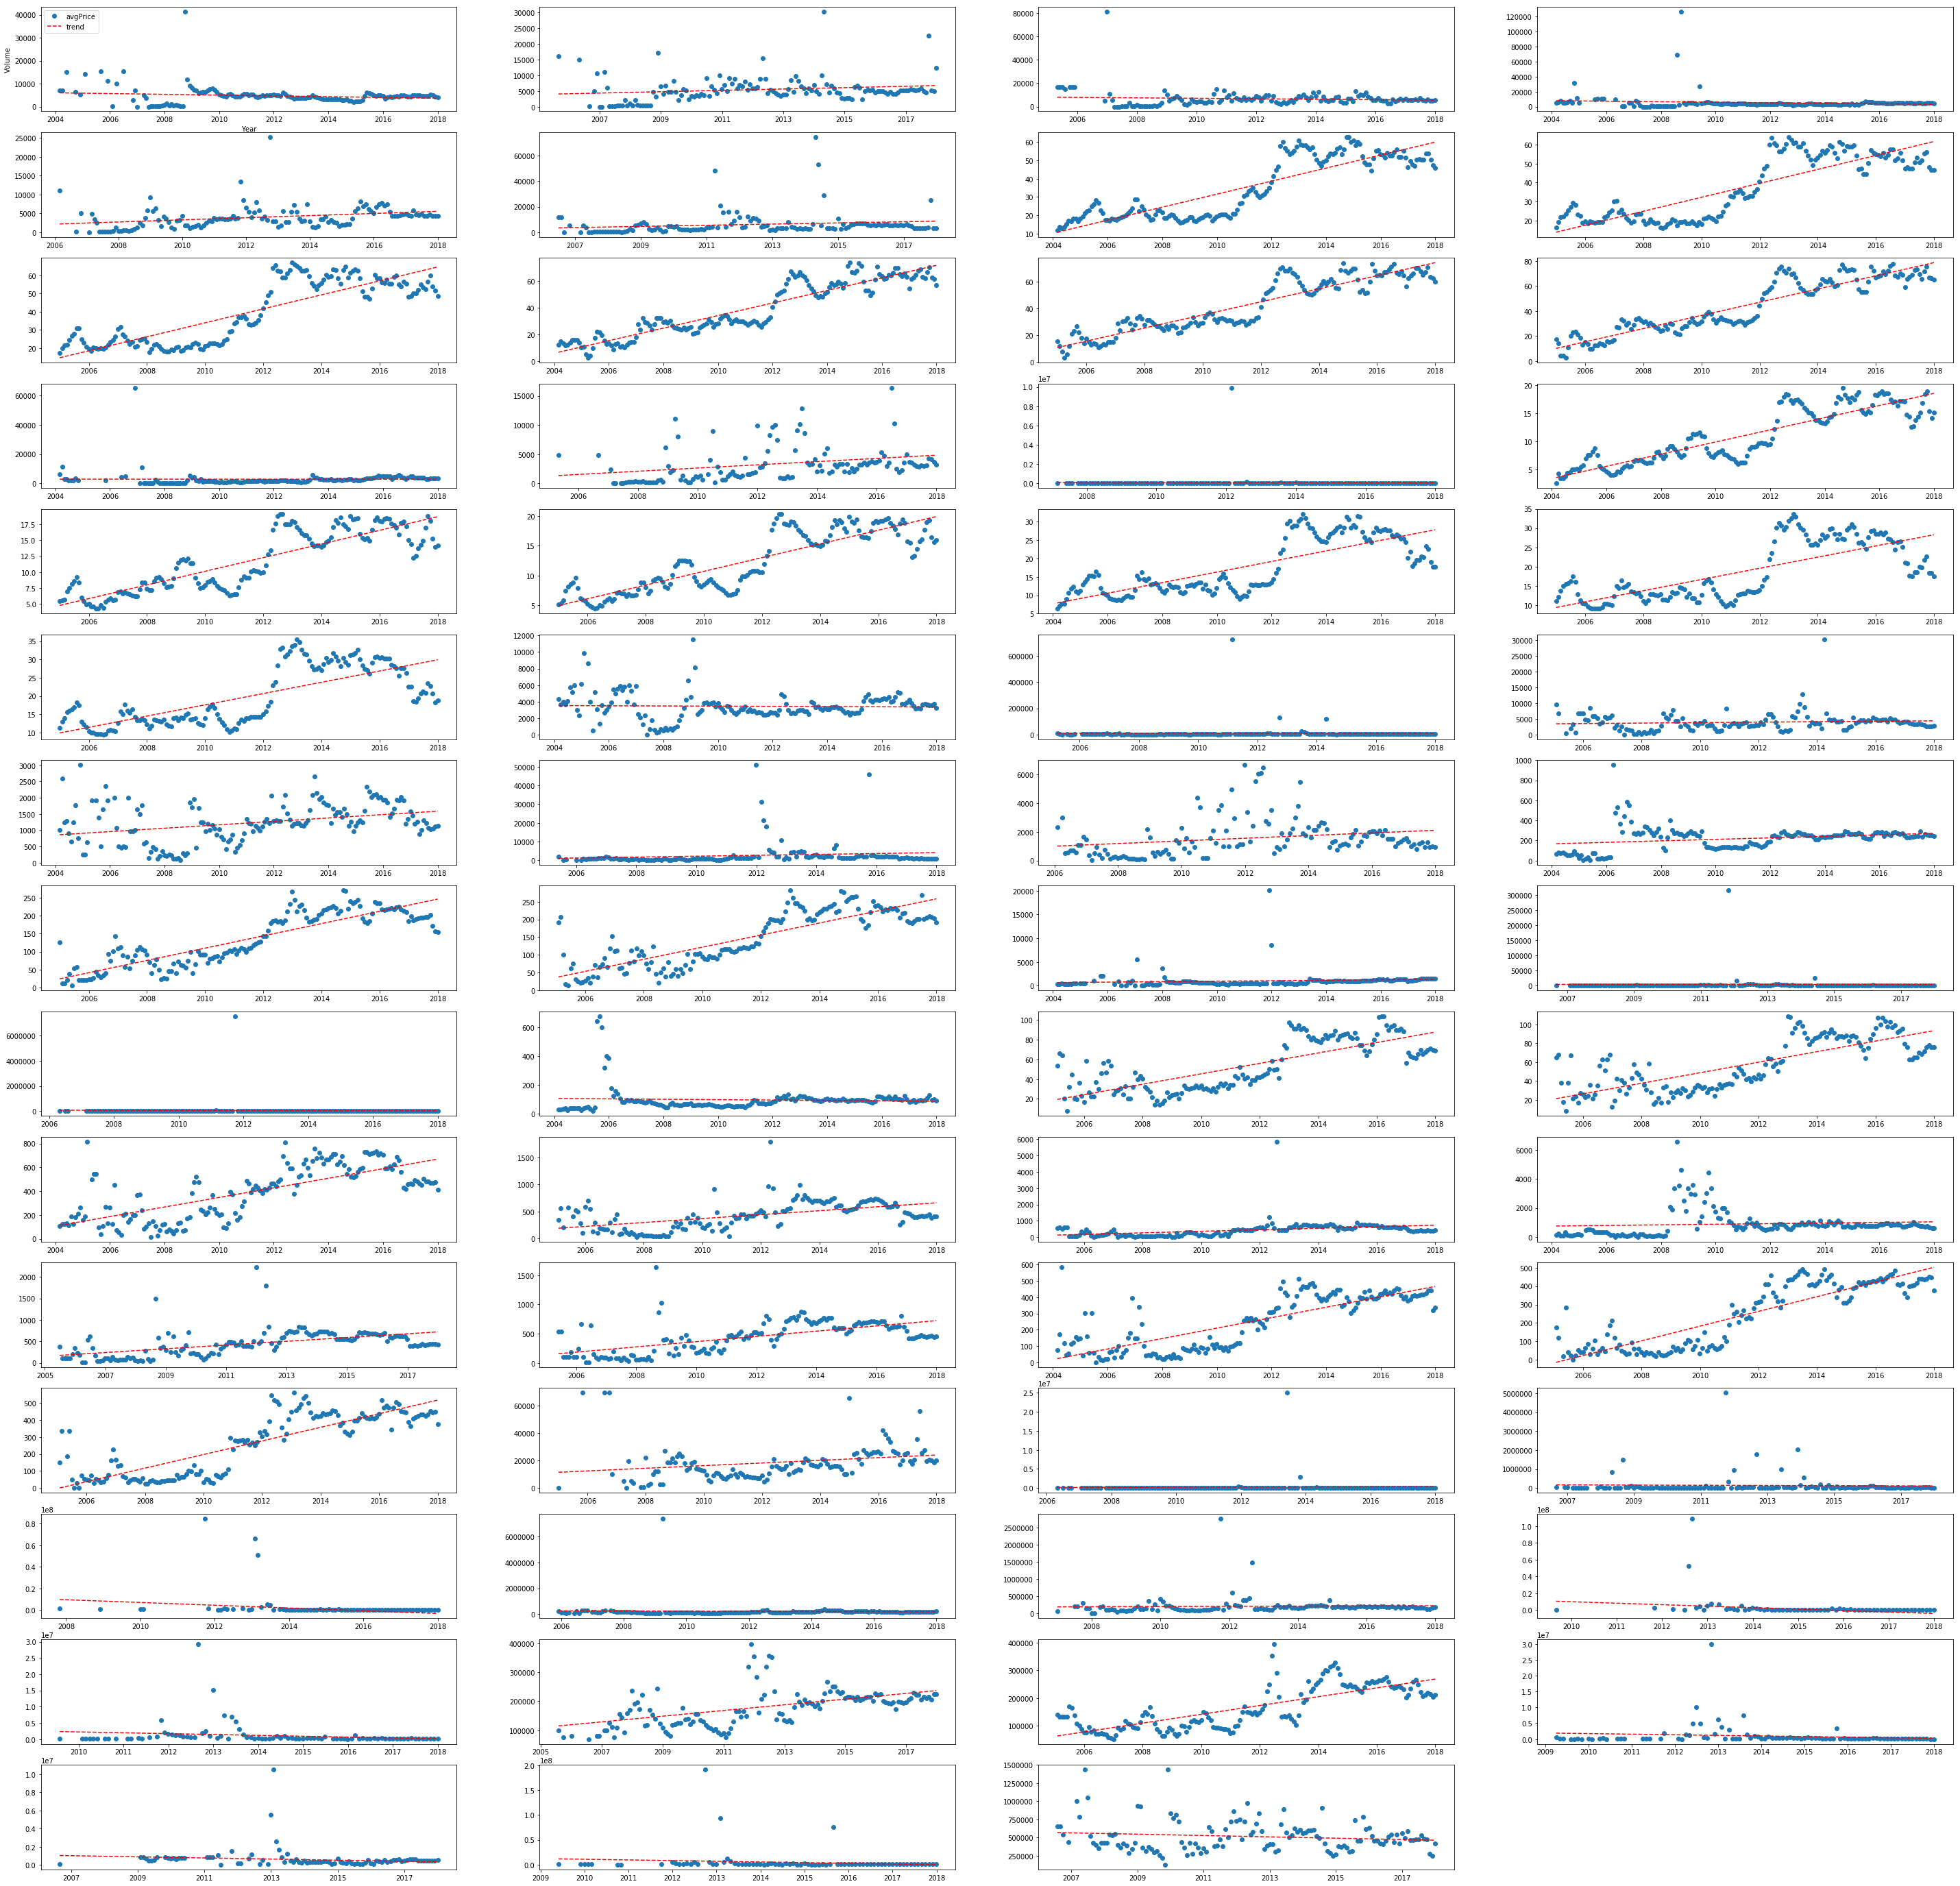

In [6]:
column_name_plot = "avgPrice"

count = 1
plt.figure(figsize=(50,50))

with open("item_ids.txt") as f:
    while True:
        line = f.readline()
        
        if line == "":
            break
            
        else:
            n = int(line)
            
            df2 = df.loc[df["typeID"] == n]

            x = df2["date"]
            y = df2[column_name_plot]
            
            df2 = df2.assign(inc_dates = np.arange(len(x)))
            
            plt.subplot(15, 4, count)
            plt.plot_date(x, y, xdate = True, label = column_name_plot)
            
            model = smf.ols(column_name_plot + ' ~ inc_dates', missing = "drop", data = df2).fit()
            intercept, coef = model.params
                
            xtl = [x.iloc[0], x.iloc[-1]]
            ytl = [intercept, intercept + coef * len(x)]
            connectpoints(xtl, ytl, 0, 1)
            
            if count == 1:
                plt.xlabel('Year')
                plt.ylabel('Volume')
                plt.legend(loc = 2)

            count += 1

plt.savefig(column_name_plot + "_plot.png")
plt.show()